<a href="https://colab.research.google.com/github/Bzitsman/data-analytics-profolio/blob/main/K_Nearest_Neighbors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Project 

The data provided was made up with artificial information. The goal of this project is to fine tune a KNN model using the elbow method to find the best value for K.


## Import Libraries

In [2]:
# for Data Analysis
import numpy as np
import pandas as pd

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

Read in the Data file and look at the top 5 lines

In [3]:
df = pd.read_csv('/content/KNN_Project_Data')
df.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


The Data is artificial and is clean. The data has one thousand entries and eleven columns. I will later drop the TARGET CLASS. I will use a pairplot to look at.

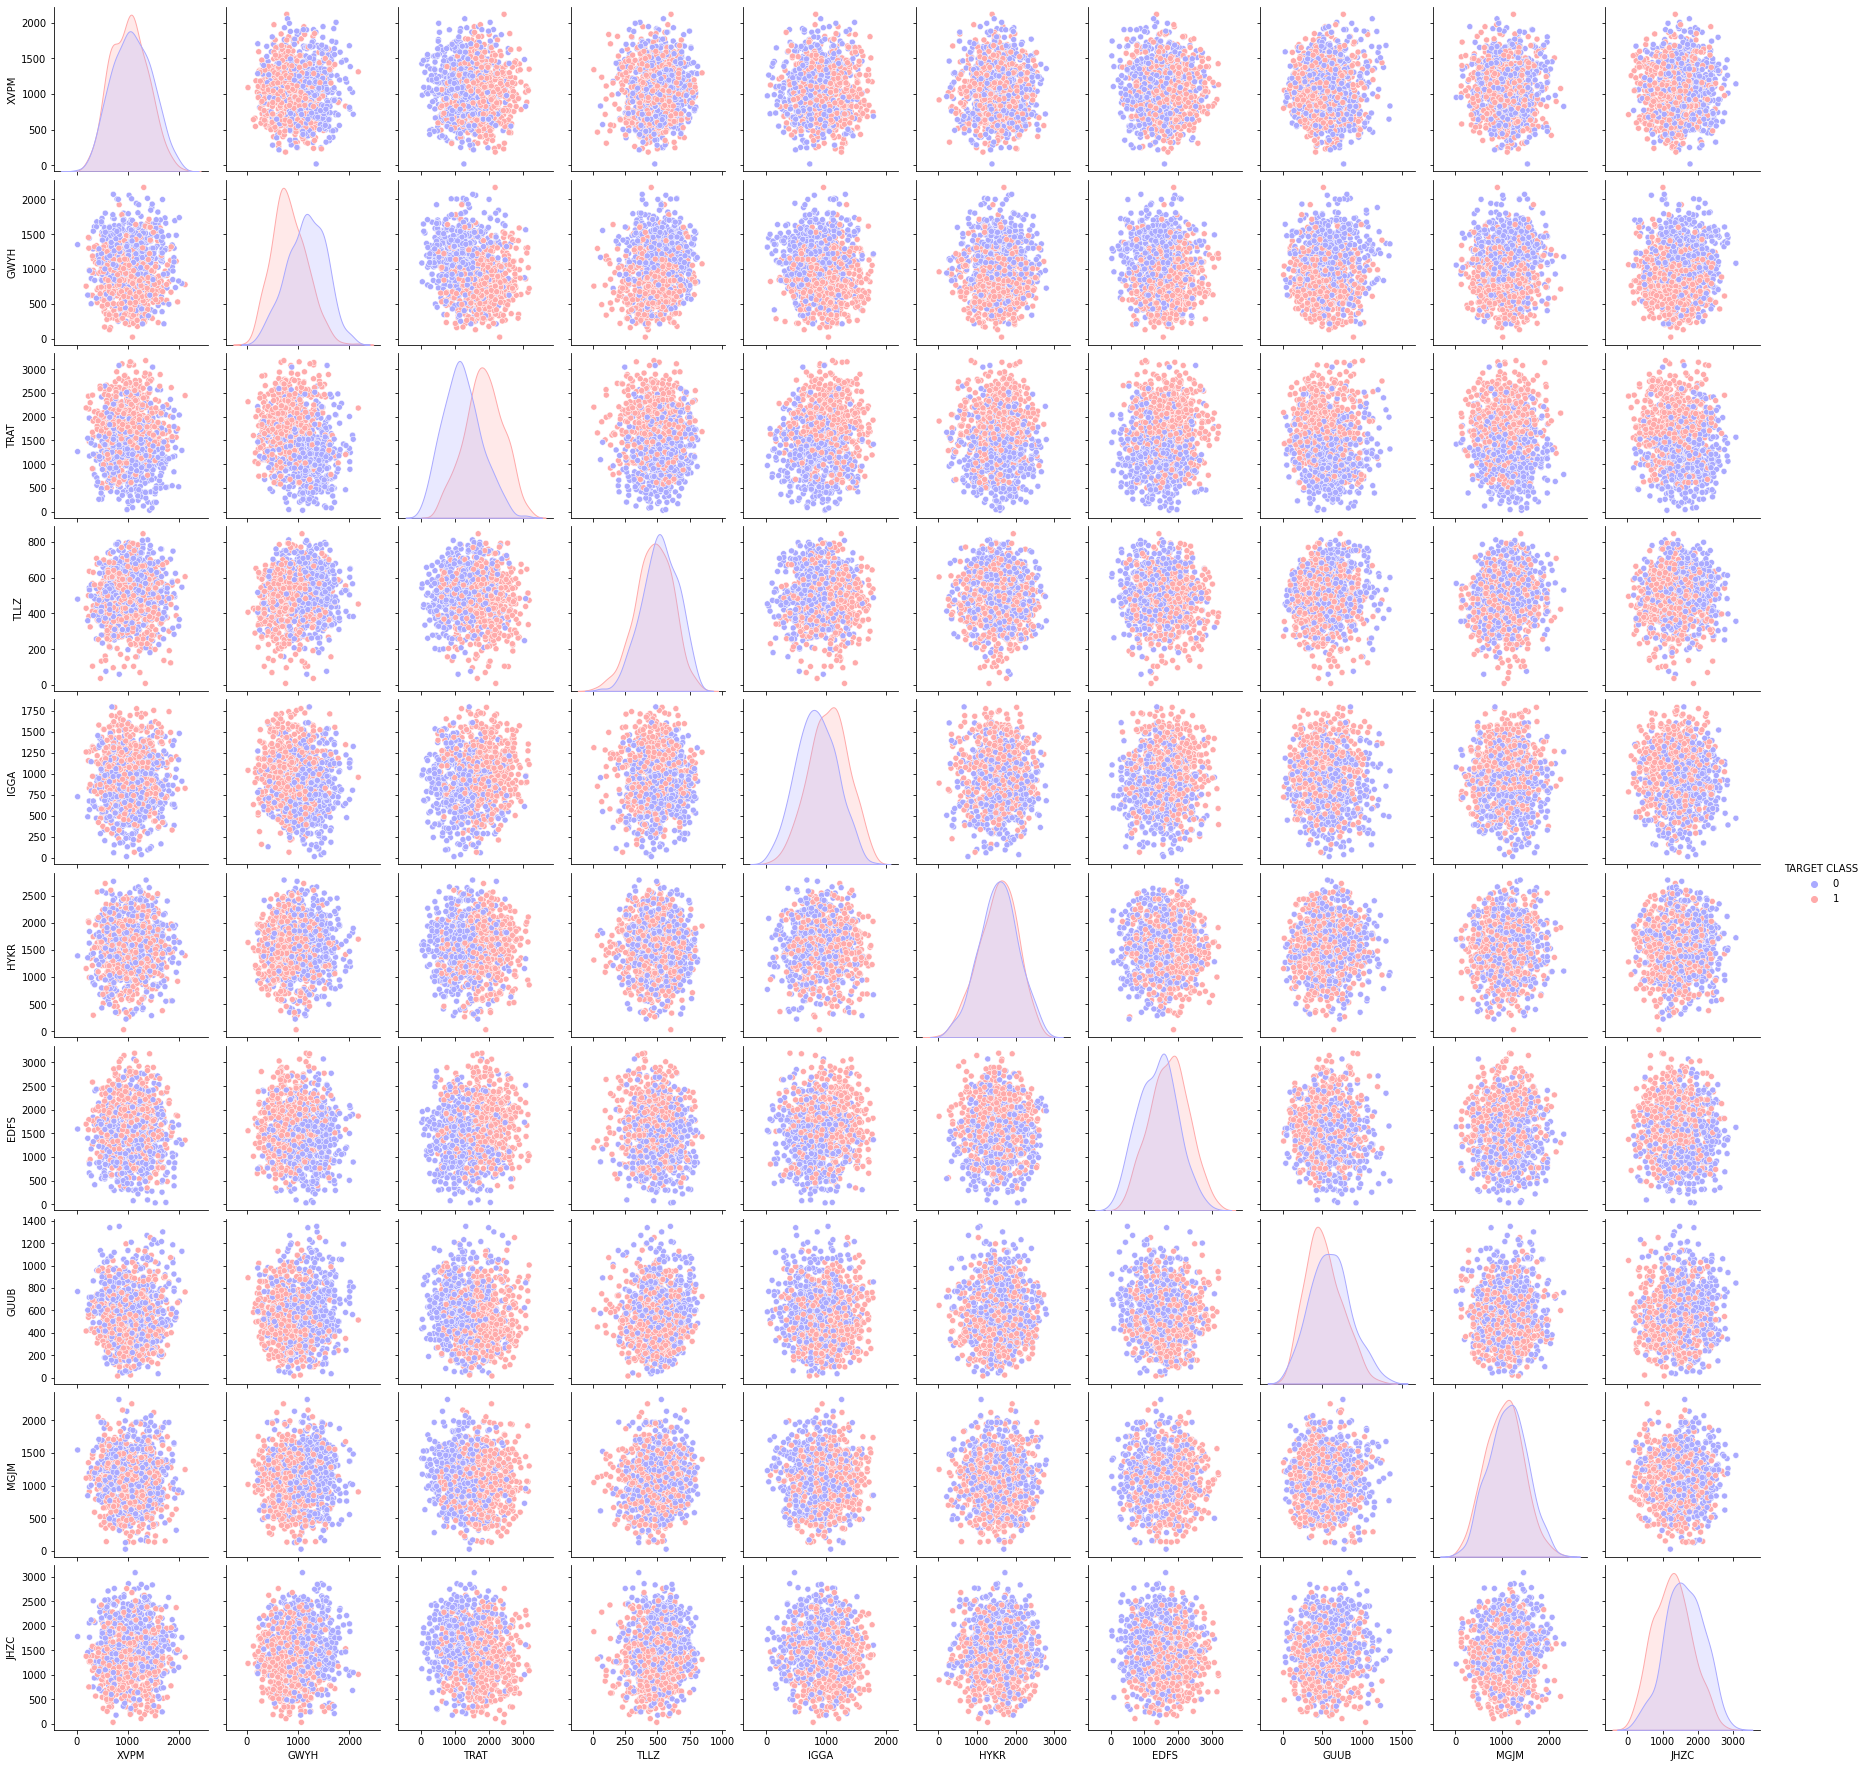

In [8]:
# This can take some time depending on your computer
sns.pairplot(df, hue='TARGET CLASS', palette='bwr')

# Standardize the Variables

In [9]:
scaler = StandardScaler()

#fit scaler ot the features drop TRAGET CLASS
scaler.fit(df.drop('TARGET CLASS',axis=1))

#Transform the features to a scaled verison
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.33, random_state=42)

# Using KNN



In [13]:
#Create a KNN Model instance with n_neigbors=1
knn = KNeighborsClassifier(n_neighbors=1)

#fit model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [16]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[119  44]
 [ 50 117]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



As this model is in the 70% range I will create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a chart.

In [19]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

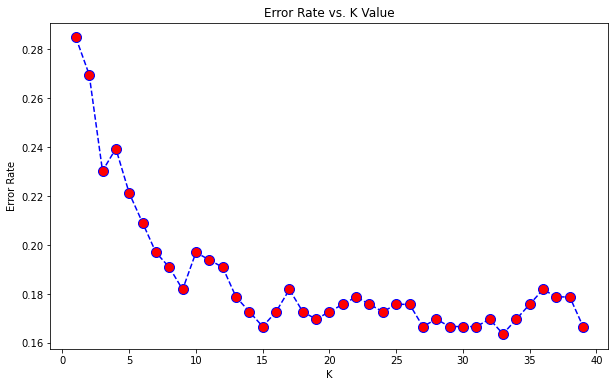

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looking a the chart I will try 15, and 30 to see what kind of impovments this will get my model.

In [21]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[138  25]
 [ 30 137]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       163
           1       0.85      0.82      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



With K=15 there is a jump in approvment now I will try K=30 as this looks to be another low point in the chart.

In [23]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[140  23]
 [ 33 134]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       163
           1       0.85      0.80      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



It looks like k=30 will give us the best results. I was able to squeeze more performance out of this model by tuning to a higher K value.